<a href="https://colab.research.google.com/github/gilsoncastro/AnaliseDeReembolsoSenado/blob/master/analise_senadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de dados de reembolso  dos senadores - 2020

In [17]:
# importando as bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [34]:

#carregando dados
df = pd.read_csv('/content/SenadoDados/senadores.csv' ,sep=';', encoding='latin1', skiprows=1, decimal=',')
#visualizando as primeiras linhas
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2020,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,14764742,06/01/2020,Despesa com energia elétrica para uso do escri...,122.62,2141820
1,2020,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,14764741,06/01/2020,Despesa com energia elétrica para uso do escri...,137.75,2141818
2,2020,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",062.135.728-64,FERNANDO WALDEIR PACINI e ANA LUCIA DA SILVA S...,001/2020,06/01/2020,Despesa com pagamento de aluguel de imóvel par...,1000.00,2139025
3,2020,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/20,02/01/2020,Despesa com pagamento de aluguel de imóvel par...,6000.00,2139020
4,2020,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,OI MÓVEL S.A.,333871612,25/12/2019,Despesa com pagamento de telefone para uso do ...,323.95,2139044


In [30]:
#visualizando a dimensão dos dados
df.shape

(7964, 11)

In [35]:
# informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7964 entries, 0 to 7963
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                7964 non-null   int64  
 1   MES                7964 non-null   int64  
 2   SENADOR            7964 non-null   object 
 3   TIPO_DESPESA       7964 non-null   object 
 4   CNPJ_CPF           7964 non-null   object 
 5   FORNECEDOR         7964 non-null   object 
 6   DOCUMENTO          7591 non-null   object 
 7   DATA               7964 non-null   object 
 8   DETALHAMENTO       3946 non-null   object 
 9   VALOR_REEMBOLSADO  7964 non-null   float64
 10  COD_DOCUMENTO      7964 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 684.5+ KB


In [37]:
#resumo númerico dos dados
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ANO,7964.0,2.020000e+03,0.000000,2020.00,2020.00,2020.00,2020.00,2020.0
MES,7964.0,3.763561e+00,2.151425,1.00,2.00,3.00,6.00,9.0
VALOR_REEMBOLSADO,7964.0,1.353600e+03,2688.919670,0.01,150.00,393.55,1454.36,40000.0
COD_DOCUMENTO,7964.0,2.143568e+06,2664.196746,2138459.00,2141332.75,2143654.50,2145850.25,2148248.0


In [41]:
# verificando valores faltantes no dados
df.isnull().sum()

ANO                     0
MES                     0
SENADOR                 0
TIPO_DESPESA            0
CNPJ_CPF                0
FORNECEDOR              0
DOCUMENTO             373
DATA                    0
DETALHAMENTO         4018
VALOR_REEMBOLSADO       0
COD_DOCUMENTO           0
dtype: int64

In [42]:
#veja que temos dados faltantes na coluna documento e detalhamento

In [43]:
# quem é o maior fornecedor ?
# já vimos que geralmente é  agência de viagens e turismo 
df['FORNECEDOR'].value_counts()

ADRIA VIAGENS E TURISMO LTDA                         163
LATAM                                                154
GOL                                                  100
CLARO S.A.                                            62
AZUL                                                  55
                                                    ... 
S M DE OLIVEIRA RESTAURANTE EIRELI-EPP                 1
Hotelaria Accor Brasil S/A                             1
PADARIA E ROTISSERIA EIREL                             1
GRL ORG. REV DE COMBUSTIVEIS, LUBRIFICANTES LTDA.      1
DILCA APARECIDA MENDES                                 1
Name: FORNECEDOR, Length: 1810, dtype: int64

In [48]:
#qual o tipo de despesa mais comum ?
df['TIPO_DESPESA'].value_counts()

Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.                                                                                                           2476
Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                   2395
Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                                 1166
Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.      722
Divulgação da atividade parlamentar                                                                                                                                                                 637


In [52]:
#qual a quantidade de reembolso de cada senador ?
df['SENADOR'].value_counts()

CARLOS VIANA           310
MAJOR OLIMPIO          246
WELLINGTON FAGUNDES    241
ZEQUINHA MARINHO       231
CONFÚCIO MOURA         224
                      ... 
ALVARO DIAS             15
OMAR AZIZ               14
STYVENSON VALENTIM      10
JADER BARBALHO           9
ORIOVISTO GUIMARÃES      1
Name: SENADOR, Length: 80, dtype: int64

In [57]:
# quanto cada senador soliticou de reembolso em 2020 ?
df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)


SENADOR
MARCIO BITTAR          304880.80
FERNANDO COLLOR        265548.32
ACIR GURGACZ           265383.21
TELMÁRIO MOTA          254603.83
MAILZA GOMES           251621.90
                         ...    
FABIANO CONTARATO       30339.72
ALVARO DIAS             17371.41
ROSE DE FREITAS         11127.07
STYVENSON VALENTIM       6393.00
ORIOVISTO GUIMARÃES      1548.02
Name: VALOR_REEMBOLSADO, Length: 80, dtype: float64

In [58]:
#qual o tipo de despesa com maior valor de reembolso?
df.groupby('TIPO_DESPESA')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)


TIPO_DESPESA
Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar                                                             3187964.64
Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.                                                                                                           2371144.62
Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                   1930023.01
Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                                 1384698.35
Divulgação da atividade parlamentar                                                                                                                                

In [59]:
# 5 maiores valores reembolsados
df.nlargest(5,'VALOR_REEMBOLSADO').T

,4901,4880,5303,5315,5329
ANO,2020,2020,2020,2020,2020
MES,7,4,2,3,4
SENADOR,MARCIO BITTAR,MARCIO BITTAR,NELSINHO TRAD,NELSINHO TRAD,NELSINHO TRAD
TIPO_DESPESA,"Contratação de consultorias, assessorias, pesq...","Contratação de consultorias, assessorias, pesq...","Contratação de consultorias, assessorias, pesq...","Contratação de consultorias, assessorias, pesq...","Contratação de consultorias, assessorias, pesq..."
CNPJ_CPF,02.456.658/0001-38,02.456.658/0001-38,37.195.146/0001-40,37.195.146/0001-40,37.195.146/0001-40
FORNECEDOR,"IDÉIAS ESTRATÉGIA, PLANEJAMENTO E PROJETO LTDA","IDÉIAS ESTRATÉGIA, PLANEJAMENTO E PROJETO LTDA",Home Mix Produção e Assessoria em Radiodifusão...,Home Mix Produção e Assessoria em Radiodifusão...,Home Mix Produção e Assessoria em Radiodifusão...
DOCUMENTO,107,000.000.105,00006445,6462,00006538
DATA,07/07/2020,06/04/2020,18/02/2020,03/03/2020,08/04/2020
DETALHAMENTO,Valor pago referente ao serviço de consultoria...,Valor pago referente ao serviço de consultoria...,Referente ao pagamento da prestação de serviço...,Referente à prestação de serviços de assessori...,"Referente ao pagamento, no mês de abril, da pr..."
VALOR_REEMBOLSADO,40000,30000,30000,30000,30000


In [62]:
# 5 menores valores de reembolso
df.nsmallest(5,'VALOR_REEMBOLSADO').T


,1436,1452,7150,5187,3544
ANO,2020,2020,2020,2020,2020
MES,3,3,1,2,1
SENADOR,DÁRIO BERGER,DÁRIO BERGER,VANDERLAN CARDOSO,MARIA DO CARMO ALVES,JOSÉ SERRA
TIPO_DESPESA,"Passagens aéreas, aquáticas e terrestres nacio...","Passagens aéreas, aquáticas e terrestres nacio...","Locomoção, hospedagem, alimentação, combustíve...","Passagens aéreas, aquáticas e terrestres nacio...",Aquisição de material de consumo para uso no e...
CNPJ_CPF,07.575.651/0001-59,33.937.681/0001-78,25.124.074/0001-60,13.038.641/0001-87,21.050.733/0001-00
FORNECEDOR,GOL LINHAS AÉREAS INTELIGENTES,LATAM,VALPOSTO COMBUSTIVEIS LTDA,SERGITUR - SERGIPE TURISMO LTDA,JOTA JORNALISMO S/A
DOCUMENTO,SR6BNK,XYEDKX,NaN,DBUGTJ,00056190
DATA,23/03/2020,25/03/2020,20/01/2020,14/01/2020,28/01/2020
DETALHAMENTO,"Companhia Aérea: GOL, Localizador: SR6BNK. Pas...","Companhia Aérea: LATAM, Localizador: XYEDKX. P...",NaN,"Companhia Aérea: LATAM, Localizador: DBUGTJ. P...",Senador José Serra - Despesa com assinatura de...
VALOR_REEMBOLSADO,0.01,0.01,0.12,0.16,0.9


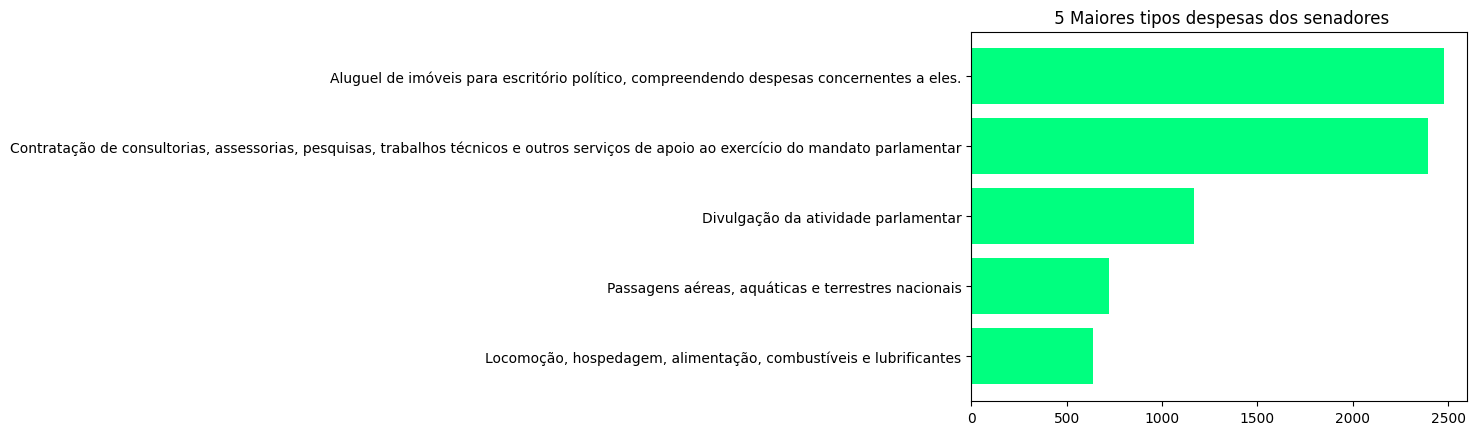

In [74]:
plt.style.use('ggplot')
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(df['TIPO_DESPESA'].value_counts()[:5]))
values = df['TIPO_DESPESA'].value_counts()[:5]
tipo = df['TIPO_DESPESA'].unique()[:5]

ax.barh(y_pos, values, align='center', color='#00FF7F')
ax.set_yticks(y_pos)
ax.set_yticklabels(tipo)
ax.invert_yaxis()
ax.set_xlabel('')
ax.set_title(' 5 Maiores tipos despesas dos senadores')
plt.show()